# Introduction

According to these articles (https://hbr.org/2018/07/research-the-average-age-of-a-successful-startup-founder-is-45 and https://www.inc.com/jeff-haden/a-study-of-27-million-startups-found-ideal-age-to-start-a-business-and-its-much-older-than-you-think.html), the average age of high-tech founders falls in the early forties.

Entrepreneurs in their 30s and 40s (between Gen Y and Boomers) have been thought to be in their prime for business success. They’ve got that supposedly-perfect balance between youth and experience. 

But is that a true claim? Let's dive into it!

## Hypothesis

Another way to phrase it is: Are CEOs/Founders of the tech companies tend to be in the middle age? 

We want to look at the ages of CEOs to determine if this is true.

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import urllib
import urllib.request

import sqlite3


import py_stringsimjoin as ssj
import py_stringmatching as sm

%matplotlib inline

## Acquiring data

We might want a list of companies, the companies' CEO names, and their ages. Our data comes from this CSV file with information about almost 50,000 companies.

In [4]:
#read the file
data = urllib.request.urlopen(\
       'https://gist.github.com/jvilledieu/c3afe5bc21da28880a30/raw/a344034b82a11433ba6f149afa47e57567d4a18f/Companies.csv')

company_data_df = pd.read_csv(data)

In [3]:
# Let's write it to SQL, and read it back

conn = sqlite3.connect('local.db')

company_data_df.to_sql("companies", conn, if_exists="replace", index=False)

pd.read_sql_query('select * from companies', conn)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1 750 000,acquired,USA,NY,New York City,New York,1,01/06/2012,2012-06,2012-Q2,2012.0,30/06/2012,30/06/2012
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4 000 000,operating,USA,CA,Los Angeles,Los Angeles,2,None,None,None,NaN,04/06/2010,23/09/2010
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40 000,operating,EST,None,Tallinn,Tallinn,1,26/10/2012,2012-10,2012-Q4,2012.0,09/08/2012,09/08/2012
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|iPhone|Apps|Mobile|iOS|E-Commerce|,Electronics,1 500 000,operating,GBR,None,London,London,1,01/04/2011,2011-04,2011-Q2,2011.0,01/04/2011,01/04/2011
4,/organization/n-plusn,+n (PlusN),http://plusn.com,|Software|,Software,1 200 000,operating,USA,NY,New York City,New York,2,01/01/2012,2012-01,2012-Q1,2012.0,29/08/2012,04/09/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47753,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|Android|Education|,Education,320 000,operating,GBR,None,London,London,1,28/01/2013,2013-01,2013-Q1,2013.0,24/03/2014,24/03/2014
47754,/organization/zznode-science-and-technology-co-ltd,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,1 587 301,operating,CHN,None,Beijing,Beijing,1,None,None,None,NaN,01/04/2012,01/04/2012
47755,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97 398,operating,HRV,None,Split,Split,5,13/05/2012,2012-05,2012-Q2,2012.0,01/11/2011,10/09/2014
47756,/organization/a-list-games,[a]list games,http://www.alistgames.com,|Games|,Games,9 300 000,operating,None,None,None,None,1,None,None,None,NaN,21/11/2011,21/11/2011


### CEOs' info
Now we need a list of the CEOs' names. Wikipedia is a nice place to start.

In [5]:
company_ceos_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_chief_executive_officers#List_of_CEOs')[0]

company_ceos_df

,Company,Executive,Title,Since,Notes,Updated
0,Accenture,Julie Sweet,CEO[1],2019,"Succeeded Pierre Nanterme, died",2019-01-31
1,Aditya Birla Group,Kumar Birla,Chairman[2],1995[2],Part of the Birla family business house in India,2018-10-01
2,Adobe Systems,Shantanu Narayen,"Chairman, president and CEO[3]",2007,Formerly with Apple Inc.,2018-10-01
3,Agenus,Garo H. Armen,"Founder, chairman, CEO[4]",1994,Founder of the Children of Armenia Fund (COAF),2018-10-01
4,Airbus,Guillaume Faury,CEO[5],2012,Succeeded Louis Gallois,2017-11-14
...,...,...,...,...,...,...
174,"Williams-Sonoma, Inc.",Laura J. Alber,President and CEO[161],2010,Replaced W. Howard Lester,2017-11-11
175,Wipro Technologies Limited,Abidali Neemuchwala,CEO[162],2016,Previously with Tata Consultancy Services,2017-11-11
176,WWE,Vince McMahon,Chairman and CEO[163],2009,Chairman of the executive committeeChairman since 1980President and CEO from 1980-1993,2017-11-11
177,Yum! Brands,Greg Creed,CEO[164],2015,Previously CEO for Taco Bell,2017-11-11


### Crawling the Wikipage
Next step is to extract the ages of the CEOs from their wiki pages. Note that a lot of the wiki pages follow this convention 'https://en.wikipedia.org/wiki/Firstname_Lastname'. We can then create a 'crawl list' with the potential wiki links

In [6]:
#create a 'crawl' list
crawl_list = []

for executive in company_ceos_df['Executive']:
    crawl_list.append('https://en.wikipedia.org/wiki/' + executive.replace(' ', '_'))

crawl_list

['https://en.wikipedia.org/wiki/Julie_Sweet',
 'https://en.wikipedia.org/wiki/Kumar_Birla',
 'https://en.wikipedia.org/wiki/Shantanu_Narayen',
 'https://en.wikipedia.org/wiki/Garo_H._Armen',
 'https://en.wikipedia.org/wiki/Guillaume_Faury',
 'https://en.wikipedia.org/wiki/Daniel_Zhang',
 'https://en.wikipedia.org/wiki/Jeff_Bezos',
 'https://en.wikipedia.org/wiki/Lisa_Su',
 'https://en.wikipedia.org/wiki/Stephen_Squeri',
 'https://en.wikipedia.org/wiki/Doug_Parker',
 'https://en.wikipedia.org/wiki/Joseph_R._Swedish',
 'https://en.wikipedia.org/wiki/Tim_Cook',
 'https://en.wikipedia.org/wiki/Lakshmi_Niwas_Mittal',
 'https://en.wikipedia.org/wiki/Randall_L._Stephenson',
 'https://en.wikipedia.org/wiki/Charles_Woodburn',
 'https://en.wikipedia.org/wiki/Tapan_Singhel',
 'https://en.wikipedia.org/wiki/Carlos_Torres_Vila',
 'https://en.wikipedia.org/wiki/Brian_Moynihan',
 'https://en.wikipedia.org/wiki/Jes_Staley',
 'https://en.wikipedia.org/wiki/Warren_Buffett',
 'https://en.wikipedia.org/wi

In [16]:
# Use urllib.urlopen to crawl all pages in crawl_list, and store the response of the page in list pages 

pages = []

for url in crawl_list:
    page = url.split("/")[-1] #extract the person name at the end of the url
    #print('Looking at file %s' % page)

    # An issue: some of the accent characters won't work.  We need to convert them
    # into an HTML URL.  We'll split the URL, then use "parse.quote" to change
    # the structure, then re-form the URL
    url_list = list(urllib.parse.urlsplit(url))
    url_list[2] = urllib.parse.quote(url_list[2])
    url_ascii = urllib.parse.urlunsplit(url_list)
    try:
        response = urllib.request.urlopen((url_ascii))
      #Save page and url for later use.
        pages.append(response)
    except urllib.error.URLError as e:
        print(e.reason)

In [17]:
# Use lxml.etree.HTML(...) on the HTML content of each page to get a DOM tree that can be processed via XPath to extract the bday information.  
# Store the CEO name, webpage, and the birthdate (born) in exec_df.

# We first check that the HTML content has a table of type `vcard`, and then extract the `bday` information.  
# If there is no birthdate, the datetime value is NaT (not a type). 

from lxml import etree

exec_df = pd.DataFrame(columns=['name','page','born'])

for page in pages:    
    tree = etree.HTML(page.read().decode("utf-8"))  #create a DOM tree of the page
    url = page.geturl()
    bday = tree.xpath('//table[contains(@class,"vcard")]//span[@class="bday"]/text()')
    if len(bday) > 0:
        name = url[url.rfind('/')+1:] # The part of the URL after the last /
        exec_df = exec_df.append({'name': name, 'page': url,
                   'born': datetime.datetime.strptime(bday[0], '%Y-%m-%d')}, ignore_index=True)
    else: 
            exec_df = exec_df.append({'name': url[url.rfind('/')+1:], 'page': url
                                      , 'born': None}, ignore_index=True)
        
exec_df

,name,page,born
0,Julie_Sweet,https://en.wikipedia.org/wiki/Julie_Sweet,NaT
1,Kumar_Birla,https://en.wikipedia.org/wiki/Kumar_Birla,1967-06-14
2,Shantanu_Narayen,https://en.wikipedia.org/wiki/Shantanu_Narayen,NaT
3,Garo_H._Armen,https://en.wikipedia.org/wiki/Garo_H._Armen,1953-01-31
4,Guillaume_Faury,https://en.wikipedia.org/wiki/Guillaume_Faury,1968-02-22
...,...,...,...
174,Laura_J._Alber,https://en.wikipedia.org/wiki/Laura_J._Alber,NaT
175,Abidali_Neemuchwala,https://en.wikipedia.org/wiki/Abidali_Neemuchwala,NaT
176,Vince_McMahon,https://en.wikipedia.org/wiki/Vince_McMahon,1945-08-24
177,Greg_Creed,https://en.wikipedia.org/wiki/Greg_Creed,NaT


In [21]:
# extract CEO's name

exec_df['name'].apply(lambda x: x.replace('_', ' '))

#another way: exec_df.apply(lambda x: x['name'].replace('_', ' '), axis = 1)

0              Julie Sweet
1              Kumar Birla
2         Shantanu Narayen
3            Garo H. Armen
4          Guillaume Faury
              ...         
174         Laura J. Alber
175    Abidali Neemuchwala
176          Vince McMahon
177             Greg Creed
178            Rich Barton
Name: name, Length: 179, dtype: object

## Data Cleaning

In [24]:
#remove the '_' in name column to extract clean names
exec_df['clean_name'] = exec_df.apply(lambda x: x['name'].replace('_', ' '), axis=1)
exec_df.drop('clean name', axis = 1)

,name,page,born,clean_name
0,Julie_Sweet,https://en.wikipedia.org/wiki/Julie_Sweet,NaT,Julie Sweet
1,Kumar_Birla,https://en.wikipedia.org/wiki/Kumar_Birla,1967-06-14,Kumar Birla
2,Shantanu_Narayen,https://en.wikipedia.org/wiki/Shantanu_Narayen,NaT,Shantanu Narayen
3,Garo_H._Armen,https://en.wikipedia.org/wiki/Garo_H._Armen,1953-01-31,Garo H. Armen
4,Guillaume_Faury,https://en.wikipedia.org/wiki/Guillaume_Faury,1968-02-22,Guillaume Faury
...,...,...,...,...
174,Laura_J._Alber,https://en.wikipedia.org/wiki/Laura_J._Alber,NaT,Laura J. Alber
175,Abidali_Neemuchwala,https://en.wikipedia.org/wiki/Abidali_Neemuchwala,NaT,Abidali Neemuchwala
176,Vince_McMahon,https://en.wikipedia.org/wiki/Vince_McMahon,1945-08-24,Vince McMahon
177,Greg_Creed,https://en.wikipedia.org/wiki/Greg_Creed,NaT,Greg Creed


In [25]:
exec_df.rename(columns = {'name' : 'old_name'})

,old_name,page,born,clean name,clean_name
0,Julie_Sweet,https://en.wikipedia.org/wiki/Julie_Sweet,NaT,Julie Sweet,Julie Sweet
1,Kumar_Birla,https://en.wikipedia.org/wiki/Kumar_Birla,1967-06-14,Kumar Birla,Kumar Birla
2,Shantanu_Narayen,https://en.wikipedia.org/wiki/Shantanu_Narayen,NaT,Shantanu Narayen,Shantanu Narayen
3,Garo_H._Armen,https://en.wikipedia.org/wiki/Garo_H._Armen,1953-01-31,Garo H. Armen,Garo H. Armen
4,Guillaume_Faury,https://en.wikipedia.org/wiki/Guillaume_Faury,1968-02-22,Guillaume Faury,Guillaume Faury
...,...,...,...,...,...
174,Laura_J._Alber,https://en.wikipedia.org/wiki/Laura_J._Alber,NaT,Laura J. Alber,Laura J. Alber
175,Abidali_Neemuchwala,https://en.wikipedia.org/wiki/Abidali_Neemuchwala,NaT,Abidali Neemuchwala,Abidali Neemuchwala
176,Vince_McMahon,https://en.wikipedia.org/wiki/Vince_McMahon,1945-08-24,Vince McMahon,Vince McMahon
177,Greg_Creed,https://en.wikipedia.org/wiki/Greg_Creed,NaT,Greg Creed,Greg Creed


In [26]:
exec_df = exec_df.drop('clean name', axis = 1)

In [27]:
exec_df

,name,page,born,clean_name
0,Julie_Sweet,https://en.wikipedia.org/wiki/Julie_Sweet,NaT,Julie Sweet
1,Kumar_Birla,https://en.wikipedia.org/wiki/Kumar_Birla,1967-06-14,Kumar Birla
2,Shantanu_Narayen,https://en.wikipedia.org/wiki/Shantanu_Narayen,NaT,Shantanu Narayen
3,Garo_H._Armen,https://en.wikipedia.org/wiki/Garo_H._Armen,1953-01-31,Garo H. Armen
4,Guillaume_Faury,https://en.wikipedia.org/wiki/Guillaume_Faury,1968-02-22,Guillaume Faury
...,...,...,...,...
174,Laura_J._Alber,https://en.wikipedia.org/wiki/Laura_J._Alber,NaT,Laura J. Alber
175,Abidali_Neemuchwala,https://en.wikipedia.org/wiki/Abidali_Neemuchwala,NaT,Abidali Neemuchwala
176,Vince_McMahon,https://en.wikipedia.org/wiki/Vince_McMahon,1945-08-24,Vince McMahon
177,Greg_Creed,https://en.wikipedia.org/wiki/Greg_Creed,NaT,Greg Creed


In [34]:
exec_df[exec_df['clean_name'] == 'Vince McMahon'][['page']]

,page
176,https://en.wikipedia.org/wiki/Vince_McMahon


In [33]:
#do this in sql
exec_df.to_sql('temp_exec', conn, if_exists="replace")
pd.read_sql_query("SELECT page FROM temp_exec WHERE clean_name = 'Vince McMahon'", conn)

,page
0,https://en.wikipedia.org/wiki/Vince_McMahon


In [36]:
#drop all NA rows where CEOs' years born are not available

exec_df.dropna(subset = ['born'])

,name,page,born,clean_name
1,Kumar_Birla,https://en.wikipedia.org/wiki/Kumar_Birla,1967-06-14,Kumar Birla
3,Garo_H._Armen,https://en.wikipedia.org/wiki/Garo_H._Armen,1953-01-31,Garo H. Armen
4,Guillaume_Faury,https://en.wikipedia.org/wiki/Guillaume_Faury,1968-02-22,Guillaume Faury
5,Daniel_Zhang,https://en.wikipedia.org/wiki/Daniel_Zhang,1972-01-11,Daniel Zhang
6,Jeff_Bezos,https://en.wikipedia.org/wiki/Jeff_Bezos,1964-01-12,Jeff Bezos
...,...,...,...,...
165,Vittorio_Colao,https://en.wikipedia.org/wiki/Vittorio_Colao,1961-10-03,Vittorio Colao
166,Herbert_Diess,https://en.wikipedia.org/wiki/Herbert_Diess,1958-10-24,Herbert Diess
169,Stefano_Pessina,https://en.wikipedia.org/wiki/Stefano_Pessina,1941-06-04,Stefano Pessina
170,Doug_McMillon,https://en.wikipedia.org/wiki/Doug_McMillon,1966-10-17,Doug McMillon


In [40]:
company_ceos_df[['Executive','Company']]

,Executive,Company
0,Julie Sweet,Accenture
1,Kumar Birla,Aditya Birla Group
2,Shantanu Narayen,Adobe Systems
3,Garo H. Armen,Agenus
4,Guillaume Faury,Airbus
...,...,...
174,Laura J. Alber,"Williams-Sonoma, Inc."
175,Abidali Neemuchwala,Wipro Technologies Limited
176,Vince McMahon,WWE
177,Greg Creed,Yum! Brands


In [41]:
exec_df[['clean_name','born']]

,clean_name,born
0,Julie Sweet,NaT
1,Kumar Birla,1967-06-14
2,Shantanu Narayen,NaT
3,Garo H. Armen,1953-01-31
4,Guillaume Faury,1968-02-22
...,...,...
174,Laura J. Alber,NaT
175,Abidali Neemuchwala,NaT
176,Vince McMahon,1945-08-24
177,Greg Creed,NaT


In [42]:
#merge the above table
pd.merge(company_ceos_df[['Executive','Company']],exec_df[['clean_name','born']], left_on = ['Executive'], 
         right_on = ['clean_name'])

,Executive,Company,clean_name,born
0,Julie Sweet,Accenture,Julie Sweet,NaT
1,Kumar Birla,Aditya Birla Group,Kumar Birla,1967-06-14
2,Shantanu Narayen,Adobe Systems,Shantanu Narayen,NaT
3,Garo H. Armen,Agenus,Garo H. Armen,1953-01-31
4,Guillaume Faury,Airbus,Guillaume Faury,1968-02-22
...,...,...,...,...
170,Laura J. Alber,"Williams-Sonoma, Inc.",Laura J. Alber,NaT
171,Abidali Neemuchwala,Wipro Technologies Limited,Abidali Neemuchwala,NaT
172,Vince McMahon,WWE,Vince McMahon,1945-08-24
173,Greg Creed,Yum! Brands,Greg Creed,NaT


In [44]:
# Test with validation rules

replace_item = ''

failed = False
for name in exec_df['clean_name']:
    if not name.replace(' ', replace_item).\
          replace('.', replace_item).\
          replace('\'',replace_item).\
          replace('-',replace_item).isalpha():
        print ("Illegal name %s"%name)
    failed = True
    
if failed:
    print('Found illegal names!')

Illegal name Harald Kr%C3%BCger
Illegal name Ola K%C3%A4llenius
Illegal name B%C3%B6rje Ekholm
Illegal name Michael O%27Leary
Found illegal names!


In [45]:
from urllib.parse import unquote

exec_df['clean_name'].apply(unquote)

0              Julie Sweet
1              Kumar Birla
2         Shantanu Narayen
3            Garo H. Armen
4          Guillaume Faury
              ...         
174         Laura J. Alber
175    Abidali Neemuchwala
176          Vince McMahon
177             Greg Creed
178            Rich Barton
Name: clean_name, Length: 179, dtype: object

In [47]:
import validators.url

In [52]:
exec_df['page'].apply(validators.url)

0      True
1      True
2      True
3      True
4      True
       ... 
174    True
175    True
176    True
177    True
178    True
Name: page, Length: 179, dtype: bool

In [53]:
# We are going to match the strings approximately, via "n-grams" or "q-grams" (sequences of n or q characters)
# Here it's five-grams

tok = sm.QgramTokenizer(qval=5,return_set=True)

In [54]:
# Now let's do a similarity join

# We'll reset the index, so there is a unique index field in the company_ceos_df dataframe
company_ceos_df.reset_index(inplace=True)

output_pairs = ssj.jaccard_join(company_ceos_df, exec_df, 'index', 'page', 'Executive', 'clean_name', tok, 0.35, 
                                l_out_attrs=['Executive'], r_out_attrs=['name'])

output_pairs[output_pairs['_sim_score'] < 1.0]

/Users/datnguyen/opt/anaconda3/lib/python3.7/site-packages/py_stringsimjoin/utils/validation.py:30: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if attr_type != pd.np.object:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


,_id,l_index,r_page,l_Executive,r_name,_sim_score
24,24,24,https://en.wikipedia.org/wiki/Harald_Kr%C3%BCger,Harald Krüger,Harald_Kr%C3%BCger,0.444444
41,41,41,https://en.wikipedia.org/wiki/Ola_K%C3%A4llenius,Ola Källenius,Ola_K%C3%A4llenius,0.444444
51,51,51,https://en.wikipedia.org/wiki/B%C3%B6rje_Ekholm,Börje Ekholm,B%C3%B6rje_Ekholm,0.423077
127,127,127,https://en.wikipedia.org/wiki/Michael_O%27Leary,Michael O'Leary,Michael_O%27Leary,0.538462


In [55]:
total = company_ceos_df.merge(output_pairs,left_on=['Executive'],right_on=['l_Executive']).\
        merge(exec_df,left_on=['r_page'],right_on=['page']).\
        merge(company_data_df, left_on='Company', right_on='name', how="left")

total

,index,Company,Executive,Title,Since,Notes,Updated,_id,l_index,r_page,...,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
0,0,Accenture,Julie Sweet,CEO[1],2019,"Succeeded Pierre Nanterme, died",2019-01-31,0,0,https://en.wikipedia.org/wiki/Julie_Sweet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Aditya Birla Group,Kumar Birla,Chairman[2],1995[2],Part of the Birla family business house in India,2018-10-01,1,1,https://en.wikipedia.org/wiki/Kumar_Birla,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Adobe Systems,Shantanu Narayen,"Chairman, president and CEO[3]",2007,Formerly with Apple Inc.,2018-10-01,2,2,https://en.wikipedia.org/wiki/Shantanu_Narayen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Agenus,Garo H. Armen,"Founder, chairman, CEO[4]",1994,Founder of the Children of Armenia Fund (COAF),2018-10-01,3,3,https://en.wikipedia.org/wiki/Garo_H._Armen,...,MA,Boston,Lexington,2.0,01/01/1994,1994-01,1994-Q1,1994.0,04/08/2009,25/04/2013
4,4,Airbus,Guillaume Faury,CEO[5],2012,Succeeded Louis Gallois,2017-11-14,4,4,https://en.wikipedia.org/wiki/Guillaume_Faury,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,174,"Williams-Sonoma, Inc.",Laura J. Alber,President and CEO[161],2010,Replaced W. Howard Lester,2017-11-11,174,174,https://en.wikipedia.org/wiki/Laura_J._Alber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,175,Wipro Technologies Limited,Abidali Neemuchwala,CEO[162],2016,Previously with Tata Consultancy Services,2017-11-11,175,175,https://en.wikipedia.org/wiki/Abidali_Neemuchwala,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,176,WWE,Vince McMahon,Chairman and CEO[163],2009,Chairman of the executive committeeChairman since 1980President and CEO from 1980-1993,2017-11-11,176,176,https://en.wikipedia.org/wiki/Vince_McMahon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,177,Yum! Brands,Greg Creed,CEO[164],2015,Previously CEO for Taco Bell,2017-11-11,177,177,https://en.wikipedia.org/wiki/Greg_Creed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
total[['born','Company','Executive']].sort_values('born')

,born,Company,Executive
102,1923-05-27,National Amusements,Sumner Redstone
71,1928-03-07,Henderson Land Development,Lee Shau Kee
19,1930-08-30,Berkshire Hathaway,Warren Buffett
87,1933-08-04,Las Vegas Sands,Sheldon Adelson
85,1935-11-01,Koch Industries Inc.,Charles G. Koch
...,...,...,...
173,NaT,Whole Foods Market,John Mackey
174,NaT,"Williams-Sonoma, Inc.",Laura J. Alber
175,NaT,Wipro Technologies Limited,Abidali Neemuchwala
177,NaT,Yum! Brands,Greg Creed


In [57]:
total.groupby(by='born').get_group(datetime.datetime.strptime('1945-08-24', '%Y-%m-%d'))[['Company','Executive','born']]

,Company,Executive,born
176,WWE,Vince McMahon,1945-08-24


In [58]:
# Let's look at when the CEOs were born

birthdays = total.groupby(by='born').count()[['Executive']]

birthdays

,Executive
born,
1923-05-27,1
1928-03-07,1
1930-08-30,1
1933-08-04,1
1935-11-01,1
...,...
1973-09-18,1
1976-11-19,1
1980-05-04,1


<AxesSubplot:xlabel='born'>

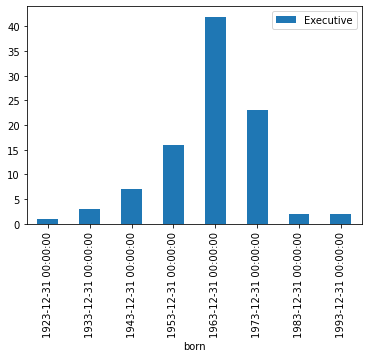

In [59]:
birthdays.resample('10A').count().plot(kind='bar')

<AxesSubplot:xlabel='born'>

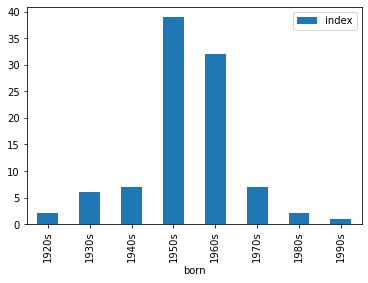

In [60]:
# Get rid of the nulls!
bdays = total[['born']].dropna()

bdays = bdays.applymap(lambda bday: str(int(bday.year / 10) * 10) + 's')

bdays.reset_index().groupby('born').count().plot(kind='bar')

## Conclusion

It looks like the majority of the CEOs in our dataset were born in the 50s and 60s, which means they are much older than the initial claim that the average age of high-tech founders falls in the early forties!

But don't let that discourage you to embark on the entrepreneurship dream. While 90% of new start-up fails, the experiences that you have from working for one are highly valuable. It is one of the most challenging things you can choose to do. It will push you past your limits, force you to learn faster, and maybe show you that once in a while the impossible is possible.